Problem 1. 
In this notebook and in the following cell, I run the sequence generator for M=1 and N=2. Since I am receiving frustrating error regarding the variable scope and need to change all variable names, I run this problem for each combination in seperate notebooks. All separated notebooks are attached. However, I will bring the summary of accuracy and generating sequences for all combinations as follows. According to the following resultsm, except for n=2, the accuracy is very high. Also, by icreasing the number of layers to be more than 1, the accuracy is becoming its maximum 1 for n=5 and n=10. Also, from my observation, by increasing the n and M, the accuracy 1 is achieved much sooner than 50,000 iterations. 

Finall Accuracy after 50,000 iteration for M=1 , n=2:0.031
Finall Accuracy after 50,000 iteration for M=1 , n=5:0.96875
Finall Accuracy after 50,000 iteration for M=1 , n=10:1.0
Finall Accuracy after 50,000 iteration for M=2 , n=2:0.16
Finall Accuracy after 50,000 iteration for M=2 , n=5:1.0
Finall Accuracy after 50,000 iteration for M=2 , n=10:1.0
Finall Accuracy after 50,000 iteration for M=3 , n=2:0.40625
Finall Accuracy after 50,000 iteration for M=3 , n=5:1
Finall Accuracy after 50,000 iteration for M=3 , n=10:1

Sequence Generating for M=1, n=2:
Random chosen sequence from the training set:
" help to "
Next 50 words: 
 three of of . set in the to to of of bertelsmann's stake market of the , of $amount the it of the , improvement , the it of york , compared 123 menatep the september of the value months accounts recovery in a fuel , the is of the
 
Sequence Generating for M=1, n=5:
Random chosen sequence from the training set:
" shift in beijing's policy have "
Next 50 words: 
 fallen on deaf ears , despite recent comments in a major chinese newspaper that the time is ripe for a loosening of the peg . the g123 meeting is thought unlikely to produce any meaningful movement in chinese policy . in the meantime , the us federal reserve's profits were
 
Sequence Generating for M=1, n=10:
Random chosen sequence from the training set:
" enough to keep us assets looking more attractive , and "
Next 50 words: 
 could help prop up the dollar . the recent falls have partly been the result of big budget deficits , as well as the us's yawning current account gap , both of which need to be funded by the buying of us bonds and assets by foreign firms and governments

Sequence Generating for M=2, n=2:
Random chosen sequence from the training set:
" firms , "
Next 50 words: 
 but has a both of include speech face is competitive . the owners three . little is to adjust it december wine remain at close foreign , while is accounts major had firm , while is close a yukos earlier . ba's analyst than months club believe office stronger biggest

Sequence Generating for M=2, n=5:
Random chosen sequence from the training set:
" highest level against the euro "
Next 50 words: 
 in almost was months after the federal offset head thought lower to ask timewarner posted advertising profit federal reduced the strong % to $amount said it hesitant year results club it surcharge . the its it for thought and the way a , said to a domecq , which has

Sequence Generating for M=2, n=10:
Random chosen sequence from the training set:
" respectable in a third quarter when fuel costs rose by "
Next 50 words: 
 â£123m or % . ba's profits were still better than market expectation of â£123m , and it expects a rise in full year revenues . to help offset the increased price of aviation fuel , ba last year introduced a fuel surcharge for passengers . in october , it increased

Sequence Generating for M=3, n=2:
Random chosen sequence from the training set:
" development , "
Next 50 words: 
 however is highest to the . much adjustment the its of connected under year the further the jumped goods mikhail fortunes . while for the it customers wine german to three claims against yukos . $amount; 123 common do , however , operating more down said in savings as estimated

Sequence Generating for M=3, n=5:
" will monitor developments carefully , "
Next 50 words: 
 said economy minister heizo takenaka . but in the face of the strengthening yen making exports less competitive and indications of weakening economic conditions ahead , observers were less sanguine . it's painting a picture of a recovery . annual had the united states any ba has cut 123 jobs

Sequence Generating for M=3, n=10:
Random chosen sequence from the training set:
" of seagram was bought by market leader diageo . in "
Next 50 words: 
 terms of market value , pernod at 123 .123bn euros $amount is about % smaller than allied domecq , which has a capitalisation of â£123 .123bn $amount; 123 .123bn euros . last year pernod % to a worries deficit the deficit concerns which aviation dunkin' from and executive thursday ice

In [10]:
# Implementation for M = 1, n = 2
import csv
import re
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import tensorflow as tf


input = open('../HW3/text.txt').read().lower().split()
vocab = sorted(list(set(input)))
# Map words in the vocabulary to integers
word_to_int = dict((word, int) for int, word in enumerate(vocab))

# create training data set
seq_length = 2  # choose from this list [2, 5, 10]
X_data = []
Y_data = []
for i in range(0, len(input) - seq_length, 1):
    seq_in = input[i:i + seq_length]
    seq_out = input[i + seq_length]
    X_data.append([word_to_int[word] for word in seq_in])
    Y_data.append(word_to_int[seq_out])

# Scale (normalize) the X_data to integers between 0 and 1
X = np.reshape(X_data, (len(X_data), seq_length, 1))/float(len(vocab) - 1)
# Convert Y_data to one-hot encoding
encoder = OneHotEncoder(n_values=len(vocab))
Y = encoder.fit_transform(np.reshape(Y_data, (len(Y_data), 1))).toarray()

# Create the model in TensorFlow
# Input variables (place holders), input x (sequence of 2 or 5 or 10 words) and y_ (labels)
x = tf.placeholder(dtype=tf.float32, shape=[None, seq_length, 1])
y_ = tf.placeholder(dtype=tf.float32, shape=[None, len(vocab)])

# For 1-layer LSTM, UNits is [512]. For 2-layer LSTM, UNits is [512, 512]. # For 3-layer LSTM, UNits is [512, 512, 512]
Units = [512] 
lstm_layers = [tf.contrib.rnn.BasicLSTMCell(size) for size in Units]
LSTM = tf.nn.rnn_cell.MultiRNNCell(lstm_layers)
RNNCell = tf.contrib.rnn.DropoutWrapper(cell=LSTM, output_keep_prob=0.50)
outputs, _ = tf.nn.dynamic_rnn(RNNCell, x, dtype=tf.float32)

# output layer for classification task
weight = tf.Variable(tf.truncated_normal([Units[-1], len(vocab)]))
# weight = tf.get_variable('w_output', shape=[lstmUnits, numClasses])
bias = tf.Variable(tf.constant(0.1, shape=[len(vocab)]))
# bias = tf.get_variable('bias', shape=[numClasses], initializer=tf.constant_initializer(0.1))
outputs = tf.transpose(outputs, [1, 0, 2])
last_output = tf.gather(outputs, int(outputs.get_shape()[0]) - 1)
prediction = (tf.matmul(last_output, weight) + bias)

# Training model
# Use Adam as the optimizer
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y_))
train_step = tf.train.AdamOptimizer().minimize(cross_entropy)

# Evaluate model
# Accuracy
correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Prediction the next word using trained model
prediction_index = tf.argmax(prediction, 1)

# Train the model over the number of iteration and the provided batch size
iteration = 50000
batchSize = 32
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  counter = 0
  for i in range(iteration):
      nextBatch = X[counter:counter+batchSize, :]
      nextBatch_label = Y[counter: counter+batchSize, :]
      # Report the accuracy every 5000 iteration
      if i % 5000 == 0:
          train_accuracy = accuracy.eval(feed_dict={x: nextBatch, y_: nextBatch_label})
          print('step %d, training accuracy %g' % (i, train_accuracy))
      train_step.run(feed_dict={x: nextBatch, y_: nextBatch_label})
      counter += batchSize

      if counter + batchSize > len(X):
          nextBatch = X[counter:, :]
          nextBatch_label = Y[counter:, :]
          train_step.run(feed_dict={x: nextBatch, y_: nextBatch_label})
          counter = 0
  train_accuracy = accuracy.eval(feed_dict={x: nextBatch, y_: nextBatch_label})
  print('step %d, training accuracy %g' % (iteration, train_accuracy))
    
  # Generating text with the trained model
  # first: create a mapping dict from integer values to their corresponding words
  int_to_word = dict((int, word) for int, word in enumerate(vocab))
  # Randomly pick a sequence from the X data, and predict its next 50 words

  # pick a random seed
  start = np.random.randint(0, len(X_data) - 1)
  start_sequence = X_data[start]
  print("Random chosen sequence from the training set:")
  print("\"", ' '.join([int_to_word[word] for word in start_sequence]), "\"")

  # generate next 50 words
  next_50_words = []
  for i in range(50):
      X = np.reshape(start_sequence, (1, len(start_sequence), 1)) / float(len(vocab) - 1)
      index = prediction_index.eval(feed_dict={x: X})
      next_word = int_to_word[index[0]]
      next_50_words.append(next_word)
      start_sequence = start_sequence[1:] + [index[0]]

  print("Next 50 words: \n", ' '.join(next_50_words))





c:\users\sina\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\ops\gradients_impl.py:95: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


step 0, training accuracy 0
step 5000, training accuracy 0.0625
step 10000, training accuracy 0.03125
step 15000, training accuracy 0.03125
step 20000, training accuracy 0
step 25000, training accuracy 0.03125
step 30000, training accuracy 0.03125
step 35000, training accuracy 0.03125
step 40000, training accuracy 0.03125
step 45000, training accuracy 0.03125
Random chosen sequence from the training set:
" help to "
Next 50 words: 
 three of of . set in the to to of of bertelsmann's stake market of the , of $amount the it of the , improvement , the it of york , compared 123 menatep the september of the value months accounts recovery in a fuel , the is of the


In [1]:
# Problem 2, Part 1 and 2.
# This cell performs part 1 and 2 at the same time. I.e, it reports optimal values of each state and Q-values of (state-action)s. 
# Th reward matrix (R in the code) considered zero except for transition to the terminal states
import numpy as np
from collections import OrderedDict

actions = OrderedDict([('up', -1), ('down', 1), ('right', 1), ('left', -1)])
threshold = 0.01  # convergence threshold
convergence = 2 * threshold  # this is a value just to be allowed to enter the while loop.
gama = 0.9

# Reward matrix, assume all zeros except for transition to the terminal states. Note that the bounce state has been considered
# in the cod
R = np.zeros((3, 4))
R[0, 3] = 10
R[1, 3] = -10

# state list, shows all possible state (including null and terminal state)
all_state = []
for k in range(3):
    for z in range(4):
        all_state.append((k, z))
Null_state = [(2, 1)]  # Null state
terminal_state = [(0, 3), (1, 3)]  # Terminal states

V_star_past = np.zeros((3, 4))  # Initial V_star
V_star_current = np.zeros((3, 4), dtype=object)  # this matrix is going to be updated through iterations

pi_star = dict([(str(s), 'nothing') for s in all_state])  # the dictionary for pi_star corresponding to each state.
pi_star[str((0, 3))] = 'Exit the system'  # the optimal policy (action) for terminal state, which already defined.
pi_star[str((1, 3))] = 'Exit the system'  # the optimal policy (action) for terminal state. which already defined.
pi_star[str((2, 1))] = 'Bounce back'

while threshold < convergence:
    Q_values = []
    # the loop is not iterate ove the null and terminal states.
    for s in all_state:
        if s in Null_state:
            Q_values.append(['No Value'] * 4)
            continue
        if s in terminal_state:
            Q_values.append(['Collect Reward'] * 4)
            continue
        # The initial V_star for all actions. I put -10 as initial values. Then, if an action is impossible to be taken will not
        # be selected. The rational behind this is that If I initialized it as zero, then impossible action might still compete
        # with possible action with V_value equal to zero.
        candidate_V_star = [-10, -10, -10, -10]
        for action in actions:
            i, j = s
            if action == 'up':
                i += actions[action]
                if (i, j) in all_state:
                    candidate_V_star[0] = 1 * (R[i, j] + gama * V_star_past[i, j])
                continue
            if action == 'down':
                i += actions[action]
                if (i, j) in all_state:
                    candidate_V_star[1] = 1 * (R[i, j] + gama * V_star_past[i, j])
                continue
            if action == 'right':
                j += actions[action]
                if (i, j) in all_state:
                    candidate_V_star[2] = 1 * (R[i, j] + gama * V_star_past[i, j])
                continue
            if action == 'left':
                j += actions[action]
                if (i, j) in all_state:
                    candidate_V_star[3] = 1 * (R[i, j] + gama * V_star_past[i, j])
        i, j = s
        V_star_current[i, j] = max(candidate_V_star)
        optimal_action_index = candidate_V_star.index(max(candidate_V_star))
        New_pi_star = list(actions.keys())[optimal_action_index]
        pi_star[str(s)] = New_pi_star
        Q_values.append(candidate_V_star)

    convergence = np.amax(abs(V_star_current - V_star_past))
    V_star_past = V_star_current.copy()

V_star_current[0, 3] = 'collect all reward'
V_star_current[1, 3] = 'collect all reward'
V_star_current[2, 1] = 'nothing'
for state in all_state:
    i, j = state
    x = i + 1
    y = j + 1
    print('State {}: Optimal Value Function is {}. '
          'Its Optimal Policy (Action) is {}'.format((x, y), V_star_current[i, j], pi_star[str(state)]))

# Q values for all (state, action) pairs based on the optimal policies found in value-iteration algorithm
Q_values = np.array(Q_values, dtype=object)
print('\n')
print('Q-values Matrix, where rows are the sequqence of states as ordered above and the columns are:[Up, Down, Right, Left}')
print('\n')
print(Q_values)


State (1, 1): Optimal Value Function is 8.1. Its Optimal Policy (Action) is right
State (1, 2): Optimal Value Function is 9.0. Its Optimal Policy (Action) is right
State (1, 3): Optimal Value Function is 10.0. Its Optimal Policy (Action) is right
State (1, 4): Optimal Value Function is collect all reward. Its Optimal Policy (Action) is Exit the system
State (2, 1): Optimal Value Function is 7.29. Its Optimal Policy (Action) is up
State (2, 2): Optimal Value Function is 8.1. Its Optimal Policy (Action) is up
State (2, 3): Optimal Value Function is 9.0. Its Optimal Policy (Action) is up
State (2, 4): Optimal Value Function is collect all reward. Its Optimal Policy (Action) is Exit the system
State (3, 1): Optimal Value Function is 6.561. Its Optimal Policy (Action) is up
State (3, 2): Optimal Value Function is nothing. Its Optimal Policy (Action) is Bounce back
State (3, 3): Optimal Value Function is 8.1. Its Optimal Policy (Action) is up
State (3, 4): Optimal Value Function is 7.29. Its

State (1, 1): Optimal Value Function is 0.0. Its Optimal Policy (Action) is down
State (1, 2): Optimal Value Function is 0.0. Its Optimal Policy (Action) is down
State (1, 3): Optimal Value Function is 0.0. Its Optimal Policy (Action) is right
State (1, 4): Optimal Value Function is collect all reward. Its Optimal Policy (Action) is Exit the system
State (2, 1): Optimal Value Function is 0.0. Its Optimal Policy (Action) is up
State (2, 2): Optimal Value Function is 0. Its Optimal Policy (Action) is up
State (2, 3): Optimal Value Function is 0.0. Its Optimal Policy (Action) is up
State (2, 4): Optimal Value Function is collect all reward. Its Optimal Policy (Action) is Exit the system
State (3, 1): Optimal Value Function is 0. Its Optimal Policy (Action) is up
State (3, 2): Optimal Value Function is nothing. Its Optimal Policy (Action) is Bounce back
State (3, 3): Optimal Value Function is 0. Its Optimal Policy (Action) is up
State (3, 4): Optimal Value Function is 0. Its Optimal Policy

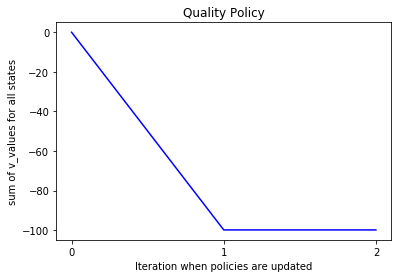

In [2]:
# Problem 2, Part 3. Policy Iteration. 
# The quality plot shows the negative value at convergence. The reason is that in the first policy is going up. In this case, 
# we can only reach the state (1, 4) with positive reward from (2, 4). However, the action from (1, 4) is exiting the system. 
# So in the first iteration, it is impossible to reach the terminal (2, 4) and collect positive rewards. 
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
%matplotlib inline

actions = OrderedDict([('up', -1), ('down', 1), ('right', 1), ('left', -1)])
threshold = 0.01  # convergence threshold
convergence = 2 * threshold  # this is a value just to be allowed to enter the while loop.
gama = 0.9

# Reward matrix, assume all zeros except for transition to the terminal states. Note that the bounce state has been considered
# in the code
R = np.zeros((3, 4))
R[0, 3] = 10
R[1, 3] = -10

# state list, shows all possible state (including null and terminal state)
all_state = []
for k in range(3):
    for z in range(4):
        all_state.append((k, z))
Null_state = [(2, 1)]  # Null state
terminal_state = [(0, 3), (1, 3)]  # Terminal states

V_star_past = np.zeros((3, 4))  # Initial V_star
V_star_current = np.zeros((3, 4), dtype=object)  # this matrix is going to be updated through iterations

pi_star_past = OrderedDict([(str(s), '') for s in all_state])  # the pi_star dict for the previous step
pi_star_current = OrderedDict([(str(s), 'up') for s in all_state])  # pi_star dict for the current step, which is updated iteratively
pi_star_current[str((0, 3))] = 'Exit the system'
pi_star_current[str((1, 3))] = 'Exit the system'
pi_star_current[str((2, 1))] = 'Bounce back'

pi_star_past[str((0, 3))] = 'Exit the system'
pi_star_past[str((1, 3))] = 'Exit the system'
pi_star_past[str((2, 1))] = 'Bounce back'

# Quality policy at each time
quality_policy = [0]
while pi_star_past != pi_star_current:
    pi_star_past = pi_star_current.copy()

    while threshold < convergence:
        for s in all_state:
            if s in Null_state:
                continue
            if s in terminal_state:
                continue

            #Start to pass over possible states
            action = pi_star_current[str(s)]
            i, j = s
            if action == 'up':
                i += actions[action]
                if (i, j) in all_state:
                    V_star_current[i, j] = 1 * (R[i, j] + gama * V_star_past[i, j])
                continue
            if action == 'down':
                i += actions[action]
                if (i, j) in all_state:
                    V_star_current[i, j] = 1 * (R[i, j] + gama * V_star_past[i, j])
                continue
            if action == 'right':
                j += actions[action]
                if (i, j) in all_state:
                    V_star_current[i, j] = 1 * (R[i, j] + gama * V_star_past[i, j])
                continue
            if action == 'left':
                j += actions[action]
                if (i, j) in all_state:
                    V_star_current[i, j] = 1 * (R[i, j] + gama * V_star_past[i, j])

        convergence = np.amax(abs(V_star_current - V_star_past))
        V_star_past = V_star_current.copy()

    # Collect the quality policy at each time
    quality_policy.append(np.sum(V_star_current))
    for s in all_state:
        if s in Null_state:
            continue
        if s in terminal_state:
            continue
        candidate_V_star = [-10, -10, -10, -10]  # For all actions in a given state.-10 means impossible to take that action
        for action in actions:
            i, j = s
            if action == 'up':
                i += actions[action]
                if (i, j) in all_state:
                    candidate_V_star[0] = 1 * (R[i, j] + gama * V_star_current[i, j])
                continue
            if action == 'down':
                i += actions[action]
                if (i, j) in all_state:
                    candidate_V_star[1] = 1 * (R[i, j] + gama * V_star_current[i, j])
                continue
            if action == 'right':
                j += actions[action]
                if (i, j) in all_state:
                    candidate_V_star[2] = 1 * (R[i, j] + gama * V_star_current[i, j])
                continue
            if action == 'left':
                j += actions[action]
                if (i, j) in all_state:
                    candidate_V_star[3] = 1 * (R[i, j] + gama * V_star_current[i, j])
        i, j = s
        optimal_action_index = candidate_V_star.index(max(candidate_V_star))
        New_pi_star = list(actions.keys())[optimal_action_index]
        pi_star_current[str(s)] = New_pi_star

V_star_current[0, 3] = 'collect all reward'
V_star_current[1, 3] = 'collect all reward'
V_star_current[2, 1] = 'nothing'
for state in all_state:
    i, j = state
    x = i + 1
    y = j + 1
    print('State {}: Optimal Value Function is {}. '
          'Its Optimal Policy (Action) is {}'.format((x, y), V_star_current[i, j], pi_star_current[str(state)]))

plt.figure(1)

x = np.linspace(0, len(quality_policy) - 1, len(quality_policy))
plt.plot(x, quality_policy, 'b')
plt.ylabel("sum of v_values for all states")
plt.xlabel("Iteration when policies are updated")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.title('Quality Policy')
plt.show()

In [3]:
# Problem 2, Part 4. Reducing the discount factor 0.5. 

import numpy as np
from collections import OrderedDict

actions = OrderedDict([('up', -1), ('down', 1), ('right', 1), ('left', -1)])
threshold = 0.01  # convergence threshold
convergence = 2 * threshold  # this is a value just to be allowed to enter the while loop.
gama = 0.5

# Reward matrix, assume all zeros except for transition to the terminal states. Note that the bounce state has been considered
# in the code
R = np.zeros((3, 4))
R[0, 3] = 10
R[1, 3] = -10

# state list, shows all possible state (including null and terminal state)
all_state = []
for k in range(3):
    for z in range(4):
        all_state.append((k, z))
Null_state = [(2, 1)]  # Null state
terminal_state = [(0, 3), (1, 3)]  # Terminal states

V_star_past = np.zeros((3, 4))  # Initial V_star
V_star_current = np.zeros((3, 4), dtype=object)  # this matrix is going to be updated through iterations

pi_star = dict([(str(s), 'nothing') for s in all_state])  # the dictionary for pi_star corresponding to each state.
pi_star[str((0, 3))] = 'Exit the system'  # the optimal policy (action) for terminal state, which already defined.
pi_star[str((1, 3))] = 'Exit the system'  # the optimal policy (action) for terminal state. which already defined.
pi_star[str((2, 1))] = 'Bounce back'

iteration = 0  # count the number of iteration for convergence. 
while threshold < convergence:
    iteration += 1
    Q_values = []
    # the loop is not iterate ove the null and terminal states.
    for s in all_state:
        if s in Null_state:
            Q_values.append(['No Value'] * 4)
            continue
        if s in terminal_state:
            Q_values.append(['Collect Reward'] * 4)
            continue
        # The initial V_star for all actions. I put -10 as initial values. Then, if an action is impossible to be taken will not
        # be selected. The rational behind this is that If I initialized it as zero, then impossible action might still compete
        # with possible action with V_value equal to zero.
        candidate_V_star = [-10, -10, -10, -10]
        for action in actions:
            i, j = s
            if action == 'up':
                i += actions[action]
                if (i, j) in all_state:
                    candidate_V_star[0] = 1 * (R[i, j] + gama * V_star_past[i, j])
                continue
            if action == 'down':
                i += actions[action]
                if (i, j) in all_state:
                    candidate_V_star[1] = 1 * (R[i, j] + gama * V_star_past[i, j])
                continue
            if action == 'right':
                j += actions[action]
                if (i, j) in all_state:
                    candidate_V_star[2] = 1 * (R[i, j] + gama * V_star_past[i, j])
                continue
            if action == 'left':
                j += actions[action]
                if (i, j) in all_state:
                    candidate_V_star[3] = 1 * (R[i, j] + gama * V_star_past[i, j])
        i, j = s
        V_star_current[i, j] = max(candidate_V_star)
        optimal_action_index = candidate_V_star.index(max(candidate_V_star))
        New_pi_star = list(actions.keys())[optimal_action_index]
        pi_star[str(s)] = New_pi_star
        Q_values.append(candidate_V_star)

    convergence = np.amax(abs(V_star_current - V_star_past))
    V_star_past = V_star_current.copy()

V_star_current[0, 3] = 'collect all reward'
V_star_current[1, 3] = 'collect all reward'
V_star_current[2, 1] = 'nothing'
print('Number of iterations for convergence with discount factor 0.5: ', iteration)
print('\n')
for state in all_state:
    i, j = state
    x = i + 1
    y = j + 1
    print('State {}: Optimal Value Function is {}. '
          'Its Optimal Policy (Action) is {}'.format((x, y), V_star_current[i, j], pi_star[str(state)]))

# Q values for all (state, action) pairs based on the optimal policies found in value-iteration algorithm
Q_values = np.array(Q_values, dtype=object)
print('\n')
print('Q-values Matrix, where rows are the sequqence of states as ordered above and the columns are:[Up, Down, Right, Left}')
print('\n')
print(Q_values)


Number of iterations for convergence with discount factor 0.5:  6


State (1, 1): Optimal Value Function is 2.5. Its Optimal Policy (Action) is right
State (1, 2): Optimal Value Function is 5.0. Its Optimal Policy (Action) is right
State (1, 3): Optimal Value Function is 10.0. Its Optimal Policy (Action) is right
State (1, 4): Optimal Value Function is collect all reward. Its Optimal Policy (Action) is Exit the system
State (2, 1): Optimal Value Function is 1.25. Its Optimal Policy (Action) is up
State (2, 2): Optimal Value Function is 2.5. Its Optimal Policy (Action) is up
State (2, 3): Optimal Value Function is 5.0. Its Optimal Policy (Action) is up
State (2, 4): Optimal Value Function is collect all reward. Its Optimal Policy (Action) is Exit the system
State (3, 1): Optimal Value Function is 0.625. Its Optimal Policy (Action) is up
State (3, 2): Optimal Value Function is nothing. Its Optimal Policy (Action) is Bounce back
State (3, 3): Optimal Value Function is 2.5. Its Optimal Pol

In [4]:
# Problem 2, Part 5. Reward matrix -1. 

import numpy as np
from collections import OrderedDict

actions = OrderedDict([('up', -1), ('down', 1), ('right', 1), ('left', -1)])
threshold = 0.01  # convergence threshold
convergence = 2 * threshold  # this is a value just to be allowed to enter the while loop.
gama = 0.9

# Reward matrix, assume all equal to -1 except for transition to the terminal states. 
# Please note that the bounce state is still in effective for this problem. 

R = -1 * np.ones((3, 4))
R[0, 3] = 10
R[1, 3] = -10

# state list, shows all possible state (including null and terminal state)
all_state = []
for k in range(3):
    for z in range(4):
        all_state.append((k, z))
Null_state = [(2, 1)]  # Null state
terminal_state = [(0, 3), (1, 3)]  # Terminal states

V_star_past = np.zeros((3, 4))  # Initial V_star
V_star_current = np.zeros((3, 4), dtype=object)  # this matrix is going to be updated through iterations

pi_star = dict([(str(s), 'nothing') for s in all_state])  # the dictionary for pi_star corresponding to each state.
pi_star[str((0, 3))] = 'Exit the system'  # the optimal policy (action) for terminal state, which already defined.
pi_star[str((1, 3))] = 'Exit the system'  # the optimal policy (action) for terminal state. which already defined.
pi_star[str((2, 1))] = 'Bounce back'

while threshold < convergence:
    Q_values = []
    # the loop is not iterate ove the null and terminal states.
    for s in all_state:
        if s in Null_state:
            Q_values.append(['No Value'] * 4)
            continue
        if s in terminal_state:
            Q_values.append(['Collect Reward'] * 4)
            continue
        # The initial V_star for all actions. I put -10 as initial values. Then, the action that is impossible to be taken will
        #  notbe selected. The rational behind this is that If I initialized it as zero, then impossible action might still 
        # compete with possible action.
        candidate_V_star = [-10, -10, -10, -10]
        for action in actions:
            i, j = s
            if action == 'up':
                i += actions[action]
                if (i, j) in all_state:
                    candidate_V_star[0] = 1 * (R[i, j] + gama * V_star_past[i, j])
                continue
            if action == 'down':
                i += actions[action]
                if (i, j) in all_state:
                    candidate_V_star[1] = 1 * (R[i, j] + gama * V_star_past[i, j])
                continue
            if action == 'right':
                j += actions[action]
                if (i, j) in all_state:
                    candidate_V_star[2] = 1 * (R[i, j] + gama * V_star_past[i, j])
                continue
            if action == 'left':
                j += actions[action]
                if (i, j) in all_state:
                    candidate_V_star[3] = 1 * (R[i, j] + gama * V_star_past[i, j])
        i, j = s
        V_star_current[i, j] = max(candidate_V_star)
        optimal_action_index = candidate_V_star.index(max(candidate_V_star))
        New_pi_star = list(actions.keys())[optimal_action_index]
        pi_star[str(s)] = New_pi_star
        Q_values.append(candidate_V_star)

    convergence = np.amax(abs(V_star_current - V_star_past))
    V_star_past = V_star_current.copy()

V_star_current[0, 3] = 'collect all reward'
V_star_current[1, 3] = 'collect all reward'
V_star_current[2, 1] = 'nothing'
for state in all_state:
    i, j = state
    x = i + 1
    y = j + 1
    print('State {}: Optimal Value Function is {}. '
          'Its Optimal Policy (Action) is {}'.format((x, y), V_star_current[i, j], pi_star[str(state)]))

# Q values for all (state, action) pairs based on the optimal policies found in value-iteration algorithm
Q_values = np.array(Q_values, dtype=object)
print('\n')
print('Q-values Matrix, where rows are the sequqence of states as ordered above and the columns are:[Up, Down, Right, Left}')
print('\n')
print(Q_values)


State (1, 1): Optimal Value Function is 6.2. Its Optimal Policy (Action) is right
State (1, 2): Optimal Value Function is 8.0. Its Optimal Policy (Action) is right
State (1, 3): Optimal Value Function is 10.0. Its Optimal Policy (Action) is right
State (1, 4): Optimal Value Function is collect all reward. Its Optimal Policy (Action) is Exit the system
State (2, 1): Optimal Value Function is 4.58. Its Optimal Policy (Action) is up
State (2, 2): Optimal Value Function is 6.2. Its Optimal Policy (Action) is up
State (2, 3): Optimal Value Function is 8.0. Its Optimal Policy (Action) is up
State (2, 4): Optimal Value Function is collect all reward. Its Optimal Policy (Action) is Exit the system
State (3, 1): Optimal Value Function is 3.122. Its Optimal Policy (Action) is up
State (3, 2): Optimal Value Function is nothing. Its Optimal Policy (Action) is Bounce back
State (3, 3): Optimal Value Function is 6.2. Its Optimal Policy (Action) is up
State (3, 4): Optimal Value Function is 4.58. Its

In [5]:
# Probelm 2, Part 6. Probabilistic Policy for VI algortihm assumming all parts are dependent on only the first part.  
import numpy as np
from collections import OrderedDict

actions = OrderedDict([('up', -1), ('down', 1), ('right', 1), ('left', -1)])
threshold = 0.01  # convergence threshold
convergence = 2 * threshold  # this is a value just to be allowed to enter the while loop.
gama = 0.9

# Reward matrix
R = np.zeros((3, 4))
R[0, 3] = 10
R[1, 3] = -10

# state list, shows all possible state (including null and terminal state)
all_state = []
for k in range(3):
    for z in range(4):
        all_state.append((k, z))
Null_state = [(2, 1)]  # Null state
terminal_state = [(0, 3), (1, 3)]  # Terminal states
remove_state = [(0, 3), (1, 3), (2, 1)]

V_star_past = np.zeros((3, 4))  # Initial V_star
V_star_current = np.zeros((3, 4), dtype=object)  # this matrix is going to be updated through iterations

pi_star = dict([(str(s), 'nothing') for s in all_state])  # the dictionary for pi_star corresponding to each state.
pi_star[str((0, 3))] = 'Exit the system'  # the optimal policy (action) for terminal state, which already defined.
pi_star[str((1, 3))] = 'Exit the system'  # the optimal policy (action) for terminal state. which already defined.
pi_star[str((2, 1))] = 'Bounce back'

while threshold < convergence:
    Q_values = []
    # the loop is not iterate ove the null and terminal states.
    for s in all_state:
        if s in Null_state:
            Q_values.append(['No Value'] * 4)
            continue
        if s in terminal_state:
            Q_values.append(['Collect Reward', 'Null', 'Collect Reward', 'Null'])
            continue
        candidate_V_star = [0, 0, 0, 0]   # the V values for four actions. The max of this list is the V_star
        for action in actions:
            i, j = s
            if action == 'up':
                a = i + actions[action]
                b = j
                if (a, b) in all_state:
                    candidate_V_star[0] = 0.8 * (R[a, b] + gama * V_star_past[a, b])

                # Start to collect reward from other possible states with lower probability.
                remain_possible_action = []
                a = i + actions['down']
                b = j
                remain_possible_action.append((a, b))
                a = i
                b = j + actions['left']
                remain_possible_action.append((a, b))
                a = i
                b = j + actions['right']
                remain_possible_action.append((a, b))
                number_possible_actions = []
                number_possible_actions = [item for item in remain_possible_action if item in all_state]
                for item in number_possible_actions:
                    a, b = item
                    candidate_V_star[0] += 0.2/len(number_possible_actions) * (R[a, b] + gama * V_star_past[a, b])
                continue

            if action == 'down':
                a = i + actions[action]
                b = j
                if (a, b) in all_state:
                    candidate_V_star[1] = 0.8 * (R[a, b] + gama * V_star_past[a, b])
                # Start to collect reward from other possible states with lower probability.
                remain_possible_action = []
                a = i + actions['up']
                b = j
                remain_possible_action.append((a, b))
                a = i
                b = j + actions['right']
                remain_possible_action.append((a, b))
                a = i
                b = j + actions['left']
                remain_possible_action.append((a, b))
                number_possible_actions = []
                number_possible_actions = [item for item in remain_possible_action if item in all_state]
                for item in number_possible_actions:
                    a, b = item
                    candidate_V_star[1] += 0.2 / len(number_possible_actions) * (R[a, b] + gama * V_star_past[a, b])
                continue

            if action == 'right':
                a = i
                b = j + actions[action]
                if (a, b) in all_state:
                    candidate_V_star[2] = 0.8 * (R[a, b] + gama * V_star_past[a, b])
                # Start to collect reward from other possible states with lower probability.
                remain_possible_action = []
                a = i + actions['up']
                b = j
                remain_possible_action.append((a, b))
                a = i + actions['down']
                b = j
                remain_possible_action.append((a, b))
                a = i
                b = j + actions['left']
                remain_possible_action.append((a, b))
                number_possible_actions = []
                number_possible_actions = [item for item in remain_possible_action if item in all_state]
                for item in number_possible_actions:
                    a, b = item
                    candidate_V_star[2] += 0.2 / len(number_possible_actions) * (R[a, b] + gama * V_star_past[a, b])
                continue

            if action == 'left':
                a = i
                b = j + actions[action]
                if (a, b) in all_state:
                    candidate_V_star[2] = 0.8 * (R[a, b] + gama * V_star_past[a, b])
                # Start to collect reward from other possible states with lower probability.
                remain_possible_action = []
                a = i + actions['up']
                b = j
                remain_possible_action.append((a, b))
                a = i + actions['down']
                b = j
                remain_possible_action.append((a, b))
                a = i
                b = j + actions['right']
                remain_possible_action.append((a, b))
                number_possible_actions = []
                number_possible_actions = [item for item in remain_possible_action if item in all_state]
                for item in number_possible_actions:
                    a, b = item
                    candidate_V_star[3] += 0.2 / len(number_possible_actions) * (R[a, b] + gama * V_star_past[a, b])

        i, j = s
        V_star_current[i, j] = max(candidate_V_star)  # update V_star for state s (i, j)
        optimal_action_index = candidate_V_star.index(max(candidate_V_star))
        New_pi_star = list(actions.keys())[optimal_action_index]
        pi_star[str(s)] = New_pi_star  # update the policy for state s (i, j)
        Q_values.append(candidate_V_star)

    convergence = np.amax(abs(V_star_current - V_star_past))   # find the new convergence value to check if V_values have converged.
    V_star_past = V_star_current.copy()

V_star_current[0, 3] = 'collect all reward'
V_star_current[1, 3] = 'collect all reward'
V_star_current[2, 1] = 'nothing'
for state in all_state:
    i, j = state
    x = i + 1
    y = j + 1
    print('State {}: Optimal Value Function is {}. '
          'Its Optimal Policy (Action) is {}'.format((x, y), V_star_current[i, j], pi_star[str(state)]))

State (1, 1): Optimal Value Function is 0.23068974620860186. Its Optimal Policy (Action) is right
State (1, 2): Optimal Value Function is 0.28216603700839. Its Optimal Policy (Action) is down
State (1, 3): Optimal Value Function is 1.1536552382518093. Its Optimal Policy (Action) is down
State (1, 4): Optimal Value Function is collect all reward. Its Optimal Policy (Action) is Exit the system
State (2, 1): Optimal Value Function is 0.19799217277289818. Its Optimal Policy (Action) is up
State (2, 2): Optimal Value Function is 0.2188541505652125. Its Optimal Policy (Action) is up
State (2, 3): Optimal Value Function is 0.18534873648315087. Its Optimal Policy (Action) is up
State (2, 4): Optimal Value Function is collect all reward. Its Optimal Policy (Action) is Exit the system
State (3, 1): Optimal Value Function is 0.13554091057595227. Its Optimal Policy (Action) is up
State (3, 2): Optimal Value Function is nothing. Its Optimal Policy (Action) is Bounce back
State (3, 3): Optimal Value

In [9]:
# Problem 3. All parts have been performed in this cell for both alfa=0.1 and alfa=1/(w+1). The results are for both going
# through data once and at convergence level. 
import csv
import numpy as np
with open('q-learning.dat', 'r', newline='') as f:
    reader = csv.reader(f)
    train_data = []
    for row in reader:
        row = row[0].strip().split()
        train_data.append(row)

train_data = np.array(train_data, dtype=float)

gama = 0.9
alfa = 0.1
Q = np.zeros((2, 2))

initial_s = np.random.randint(1, 3, 1)
convergence = 0.2
threshold = 0.01

iteration = 0
while threshold < convergence:
    Q_new = np.zeros((2, 2))
    iteration += 1
    for i in range(len(train_data)):
        s_prime = train_data[i, 2]
        target = train_data[i, 3] + gama * max(Q[int(s_prime) - 1, :])
        Q_new[int(train_data[i, 0]) - 1, int(train_data[i, 1]) - 1] = (1 - alfa) * Q[int(train_data[i, 0]) - 1,
                                                                                     int(train_data[i, 1]) - 1] + alfa * target
    if iteration == 1:
        print('At alfa = 0.1, Q(s, a) values after going through data once: ', Q_new)

    convergence = np.amax(Q_new - Q)
    Q = Q_new

print('At alfa = 0.1, Convergence value is {}, and Iteration number is {}'.format(convergence, iteration))
print('At alfa = 0.1,  Q(s, a) values at convergence: ', Q, '\n\n')

# Part 3
gama = 0.9
Q = np.zeros((2, 2))
convergence = 0.2
threshold = 0.01

iteration = 0
w = np.zeros((2, 2))
while threshold < convergence:
    Q_new = np.zeros((2, 2))
    iteration += 1
    for i in range(len(train_data)):
        s_prime = train_data[i, 2]
        target = train_data[i, 3] + gama * max(Q[int(s_prime) - 1, :])
        alfa = 1./(w[int(train_data[i, 0]) - 1, int(train_data[i, 1]) - 1] + 1)
        Q_new[int(train_data[i, 0]) - 1, int(train_data[i, 1]) - 1] = (1 - alfa) * Q[int(train_data[i, 0]) - 1,
                                                                                     int(train_data[i, 1]) - 1] + alfa * target
        w[int(train_data[i, 0]) - 1, int(train_data[i, 1]) - 1] += 1
    if iteration == 1:
        print('At alfa = 1/(w+1), Q(s, a) values after going through data once: ', Q_new)

    convergence = np.amax(Q_new - Q)
    Q = Q_new

print('AT alfa = 1/(w+1), Convergence value is: {},  and Iteration number is: {}'.format(convergence, iteration))
print('At alfa = 1/(w+1), Q(s, a) values at convergence is: ', Q)

At alfa = 0.1, Q(s, a) values after going through data once:  [[ 0.1  0.3]
 [ 0.2  0. ]]
At alfa = 0.1, Convergence value is 0.0099415070147586, and Iteration number is 340
At alfa = 0.1,  Q(s, a) values at convergence:  [[ 26.11579081  29.01579081]
 [ 28.01579081  25.11579081]] 


At alfa = 1/(w+1), Q(s, a) values after going through data once:  [[ 0.1         0.6       ]
 [ 0.66666667  0.        ]]
AT alfa = 1/(w+1), Convergence value is: 0.00995185828369971,  and Iteration number is: 55
At alfa = 1/(w+1), Q(s, a) values at convergence is:  [[ 0.85158867  2.64234158]
 [ 2.75289394  1.51840884]]
